Số lượng ảnh: 9450
Số lượng nhãn: 9450
Kích thước mỗi ảnh (sau khi flatten): (65536,)
Các nhãn: [0 1 2]


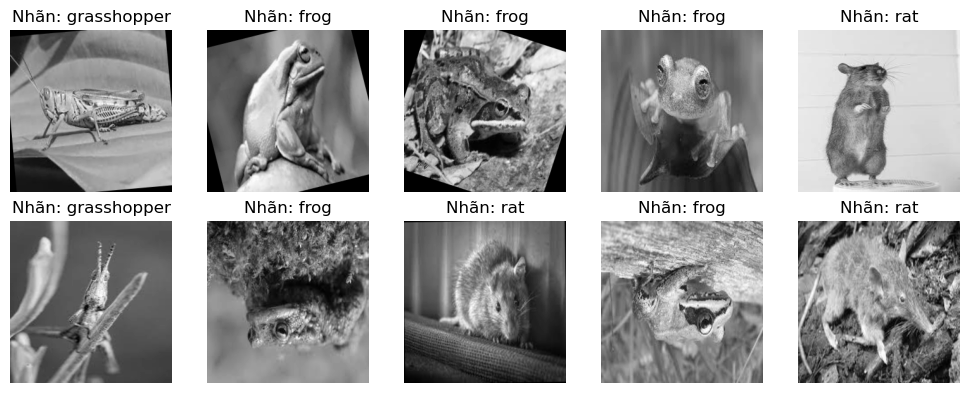

Độ chính xác: 0.47883597883597884

Báo cáo phân loại:
              precision    recall  f1-score   support

        frog       0.47      0.65      0.55       644
 grasshopper       0.46      0.58      0.51       633
         rat       0.56      0.20      0.30       613

    accuracy                           0.48      1890
   macro avg       0.50      0.47      0.45      1890
weighted avg       0.50      0.48      0.45      1890


Confusion Matrix:
[[418 189  37]
 [210 364  59]
 [260 230 123]]


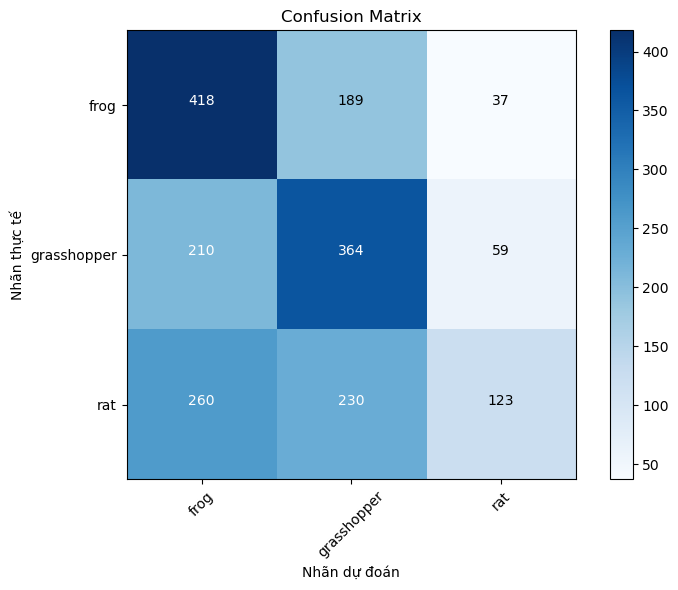

In [2]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import random

# Cài đặt đường dẫn
data_dir = "/home/ultimatebrok/Documents/image/animaldata/final_dataset/"
classes = ["frog", "grasshopper", "rat"]
img_size = 256

# Hàm hỗ trợ
def load_and_preprocess_image(image_path):
    """Tải ảnh, chuyển về ảnh xám và resize."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    return cv2.resize(img, (img_size, img_size))

def data_augmentation(image, num_variations=5):
    """Tạo biến thể từ ảnh gốc bằng các phép biến đổi đơn giản."""
    augmented_images = [image]
    for _ in range(num_variations):
        # Xoay ngẫu nhiên
        angle = random.randint(-20, 20)
        M = cv2.getRotationMatrix2D((img_size / 2, img_size / 2), angle, 1)
        rotated = cv2.warpAffine(image, M, (img_size, img_size))
        augmented_images.append(rotated)
    
        # Lật ảnh
        flipped_horizontally = cv2.flip(image, 1) # Lật ngang
        augmented_images.append(flipped_horizontally)

        flipped_vertically = cv2.flip(image, 0) # Lật dọc
        augmented_images.append(flipped_vertically)

        # Thay đổi độ sáng ngẫu nhiên
        brightness_factor = 1 + random.uniform(-0.2, 0.2)
        brightened = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)
        augmented_images.append(brightened)

    return augmented_images

# 1. Thu nhập và tiền xử lý dữ liệu
data = []
labels = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        img = load_and_preprocess_image(image_path)
        if img is not None:
            augmented_images = data_augmentation(img)
            for augmented_img in augmented_images:
              data.append(augmented_img.flatten())  # Chuyển ảnh 2D thành vector 1D
              labels.append(classes.index(class_name))

data = np.array(data)
labels = np.array(labels)

# 2. Tìm hiểu tập dữ liệu
print("Số lượng ảnh:", len(data))
print("Số lượng nhãn:", len(labels))
print("Kích thước mỗi ảnh (sau khi flatten):", data[0].shape)
print("Các nhãn:", np.unique(labels))

# Hiển thị một số ảnh mẫu
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    random_index = random.randint(0, len(data) - 1)
    ax.imshow(data[random_index].reshape(img_size, img_size), cmap='gray')
    ax.set_title(f"Nhãn: {classes[labels[random_index]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# 3. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# 4. Huấn luyện mô hình Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 5. Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# 6. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)

print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=classes))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Hiển thị confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán')
plt.tight_layout()
plt.show()